<a href="https://colab.research.google.com/github/PatchavaKoushikChowdary/pytorch_workflow/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import matplotlib.pyplot as plt

In [6]:
wt = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = wt * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
len(X),len(y)

(50, 50)

Splitting the data into two sets
1.Training set
2.Test set

In [15]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

Visualizing our data

In [18]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14});


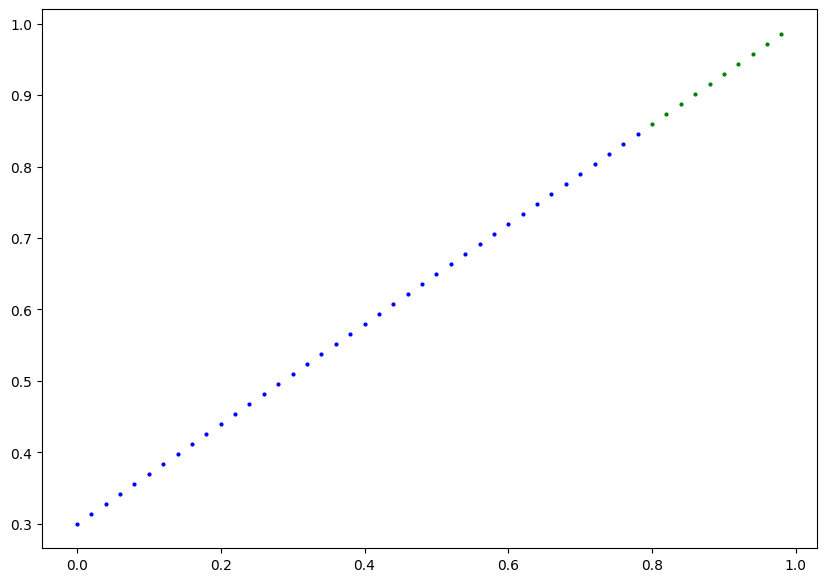

In [19]:
plot_predictions();

Building model

In [24]:
import torch.nn as nn
import torch.nn.functional as F
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [26]:
torch.manual_seed(24)
torch.randn(1)

tensor([1.0139])

In [29]:
torch.manual_seed(24)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([1.0139], requires_grad=True),
 Parameter containing:
 tensor([0.8988], requires_grad=True)]

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.0139])), ('bias', tensor([0.8988]))])

In [32]:
y_preds=model_0(X_test)
y_preds

tensor([[1.7100],
        [1.7303],
        [1.7505],
        [1.7708],
        [1.7911],
        [1.8114],
        [1.8317],
        [1.8519],
        [1.8722],
        [1.8925]], grad_fn=<AddBackward0>)

In [38]:
torch.inference_mode()
y_preds = model_0(X_test)
y_preds
torch.no_grad()
with torch.no_grad():
  y_preds = model_0(X_test)

In [39]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

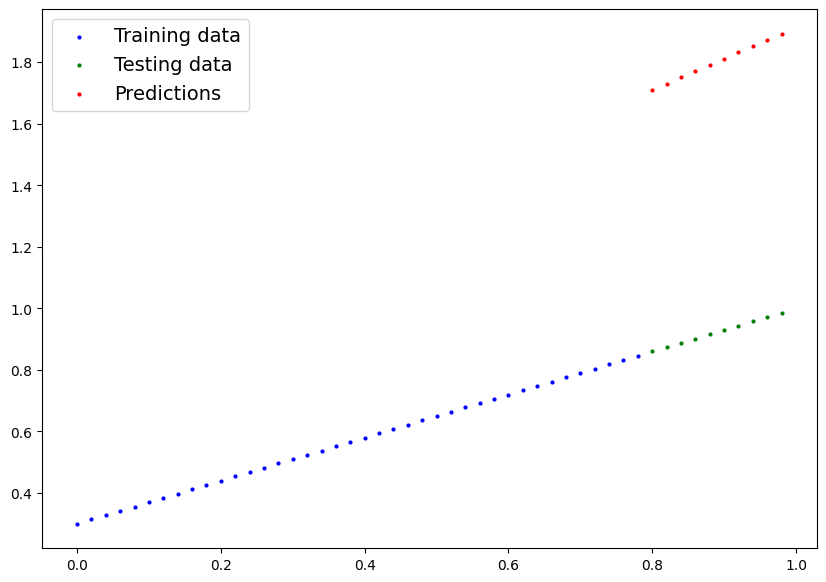

In [40]:
plot_predictions(predictions=y_preds)

Training model

In [41]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.0139], requires_grad=True),
 Parameter containing:
 tensor([0.8988], requires_grad=True)]

In [42]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.0139])), ('bias', tensor([0.8988]))])

In [43]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [44]:
loss_fn

L1Loss()

Optimization loop

In [53]:
import torch

torch.manual_seed(42)

epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")


Epoch: 0 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 10 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 20 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 30 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 40 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 50 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 60 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 70 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 80 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829
Epoch: 90 | MAE Train Loss: 0.00856039673089981 | MAE Test Loss: 0.0002978205739054829


In [57]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7096])), ('bias', tensor([0.3048]))])

And the original values for weights and bias are:


making predictions

In [58]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8725],
        [0.8867],
        [0.9009],
        [0.9151],
        [0.9292],
        [0.9434],
        [0.9576],
        [0.9718],
        [0.9860],
        [1.0002]])

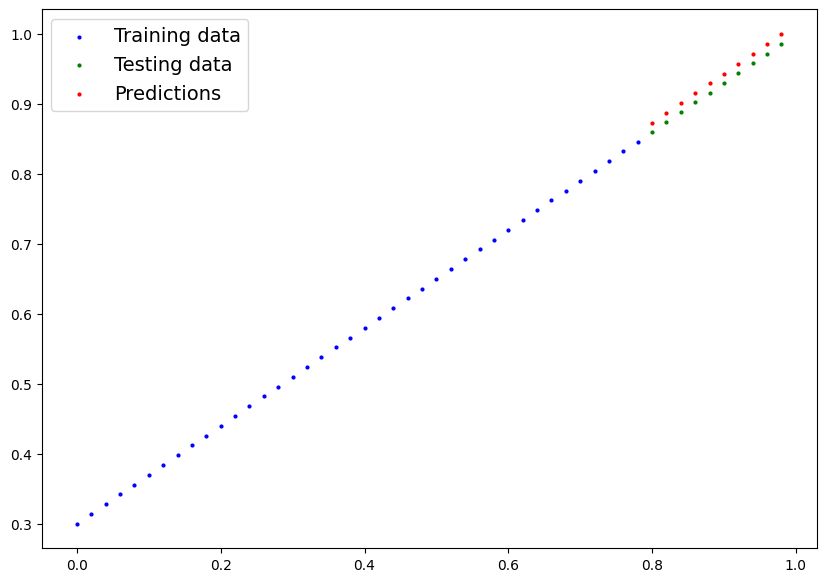

In [59]:
plot_predictions(predictions=y_preds)

loading a PyTorch model

In [60]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [61]:
!ls -l models/01_pytorch_workflow_model_0.pth


-rw-r--r-- 1 root root 1680 Feb 13 16:19 models/01_pytorch_workflow_model_0.pth


In [62]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [63]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [64]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Building linear model

In [65]:
import torch.nn as nn
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [66]:
next(model_1.parameters()).device

device(type='cpu')

In [68]:
import torch.optim as optim
loss_fn = nn.L1Loss()
optimizer = optim.SGD(params=model_1.parameters(), lr=0.01)

In [70]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
epochs = 1000
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [72]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And the original values for weights and bias are:


Predictions

In [75]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

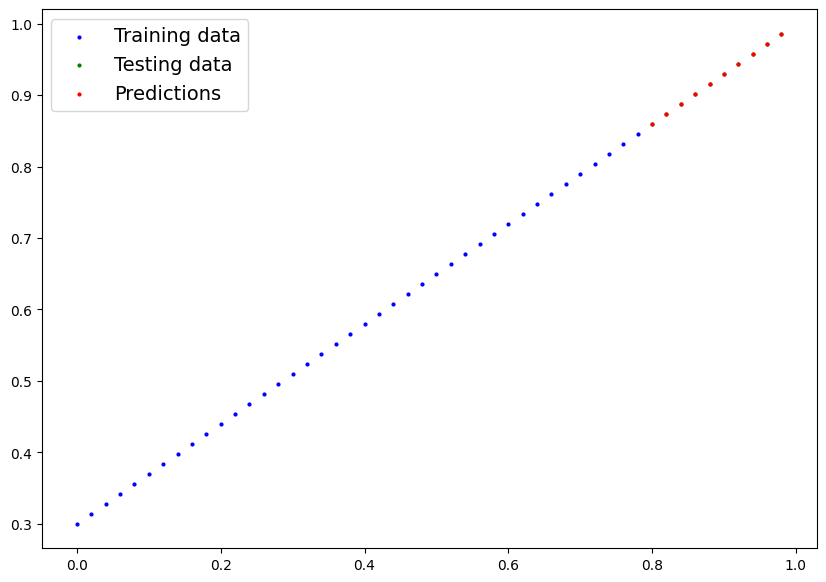

In [76]:
plot_predictions(predictions=y_preds.cpu())

In [78]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.to(device)
print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu
